# Tarea Semanal 15

## Analitico

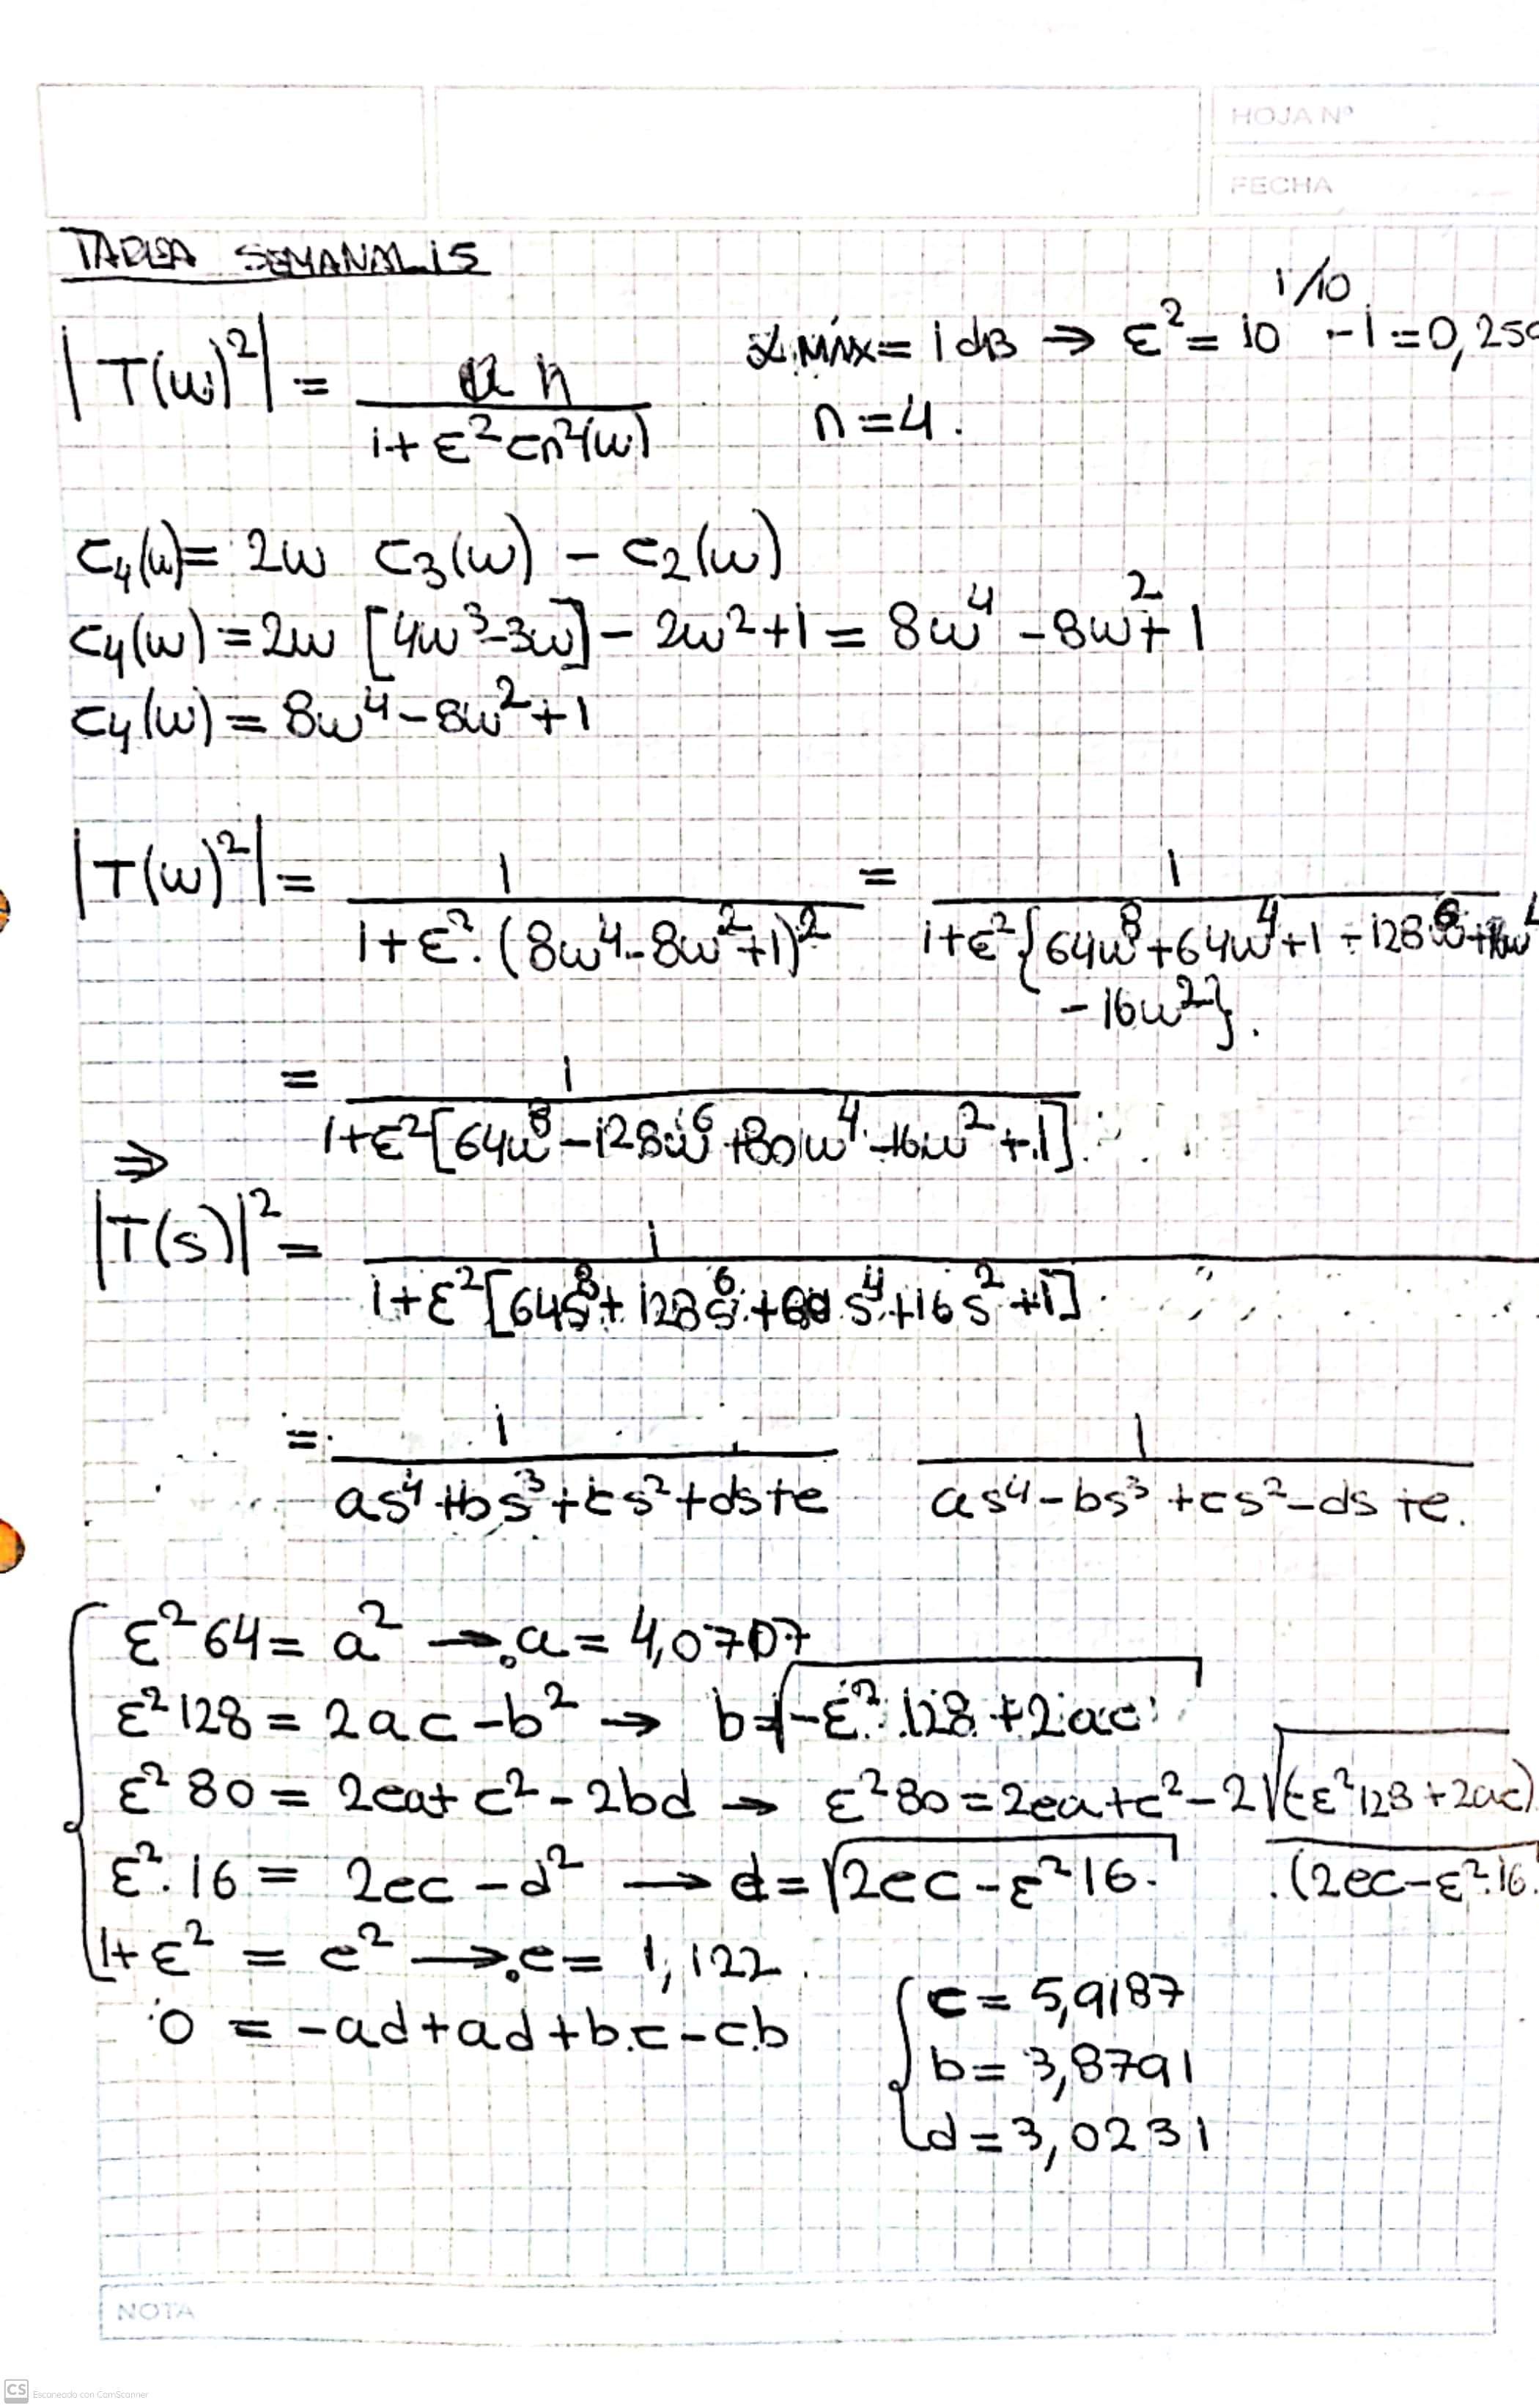


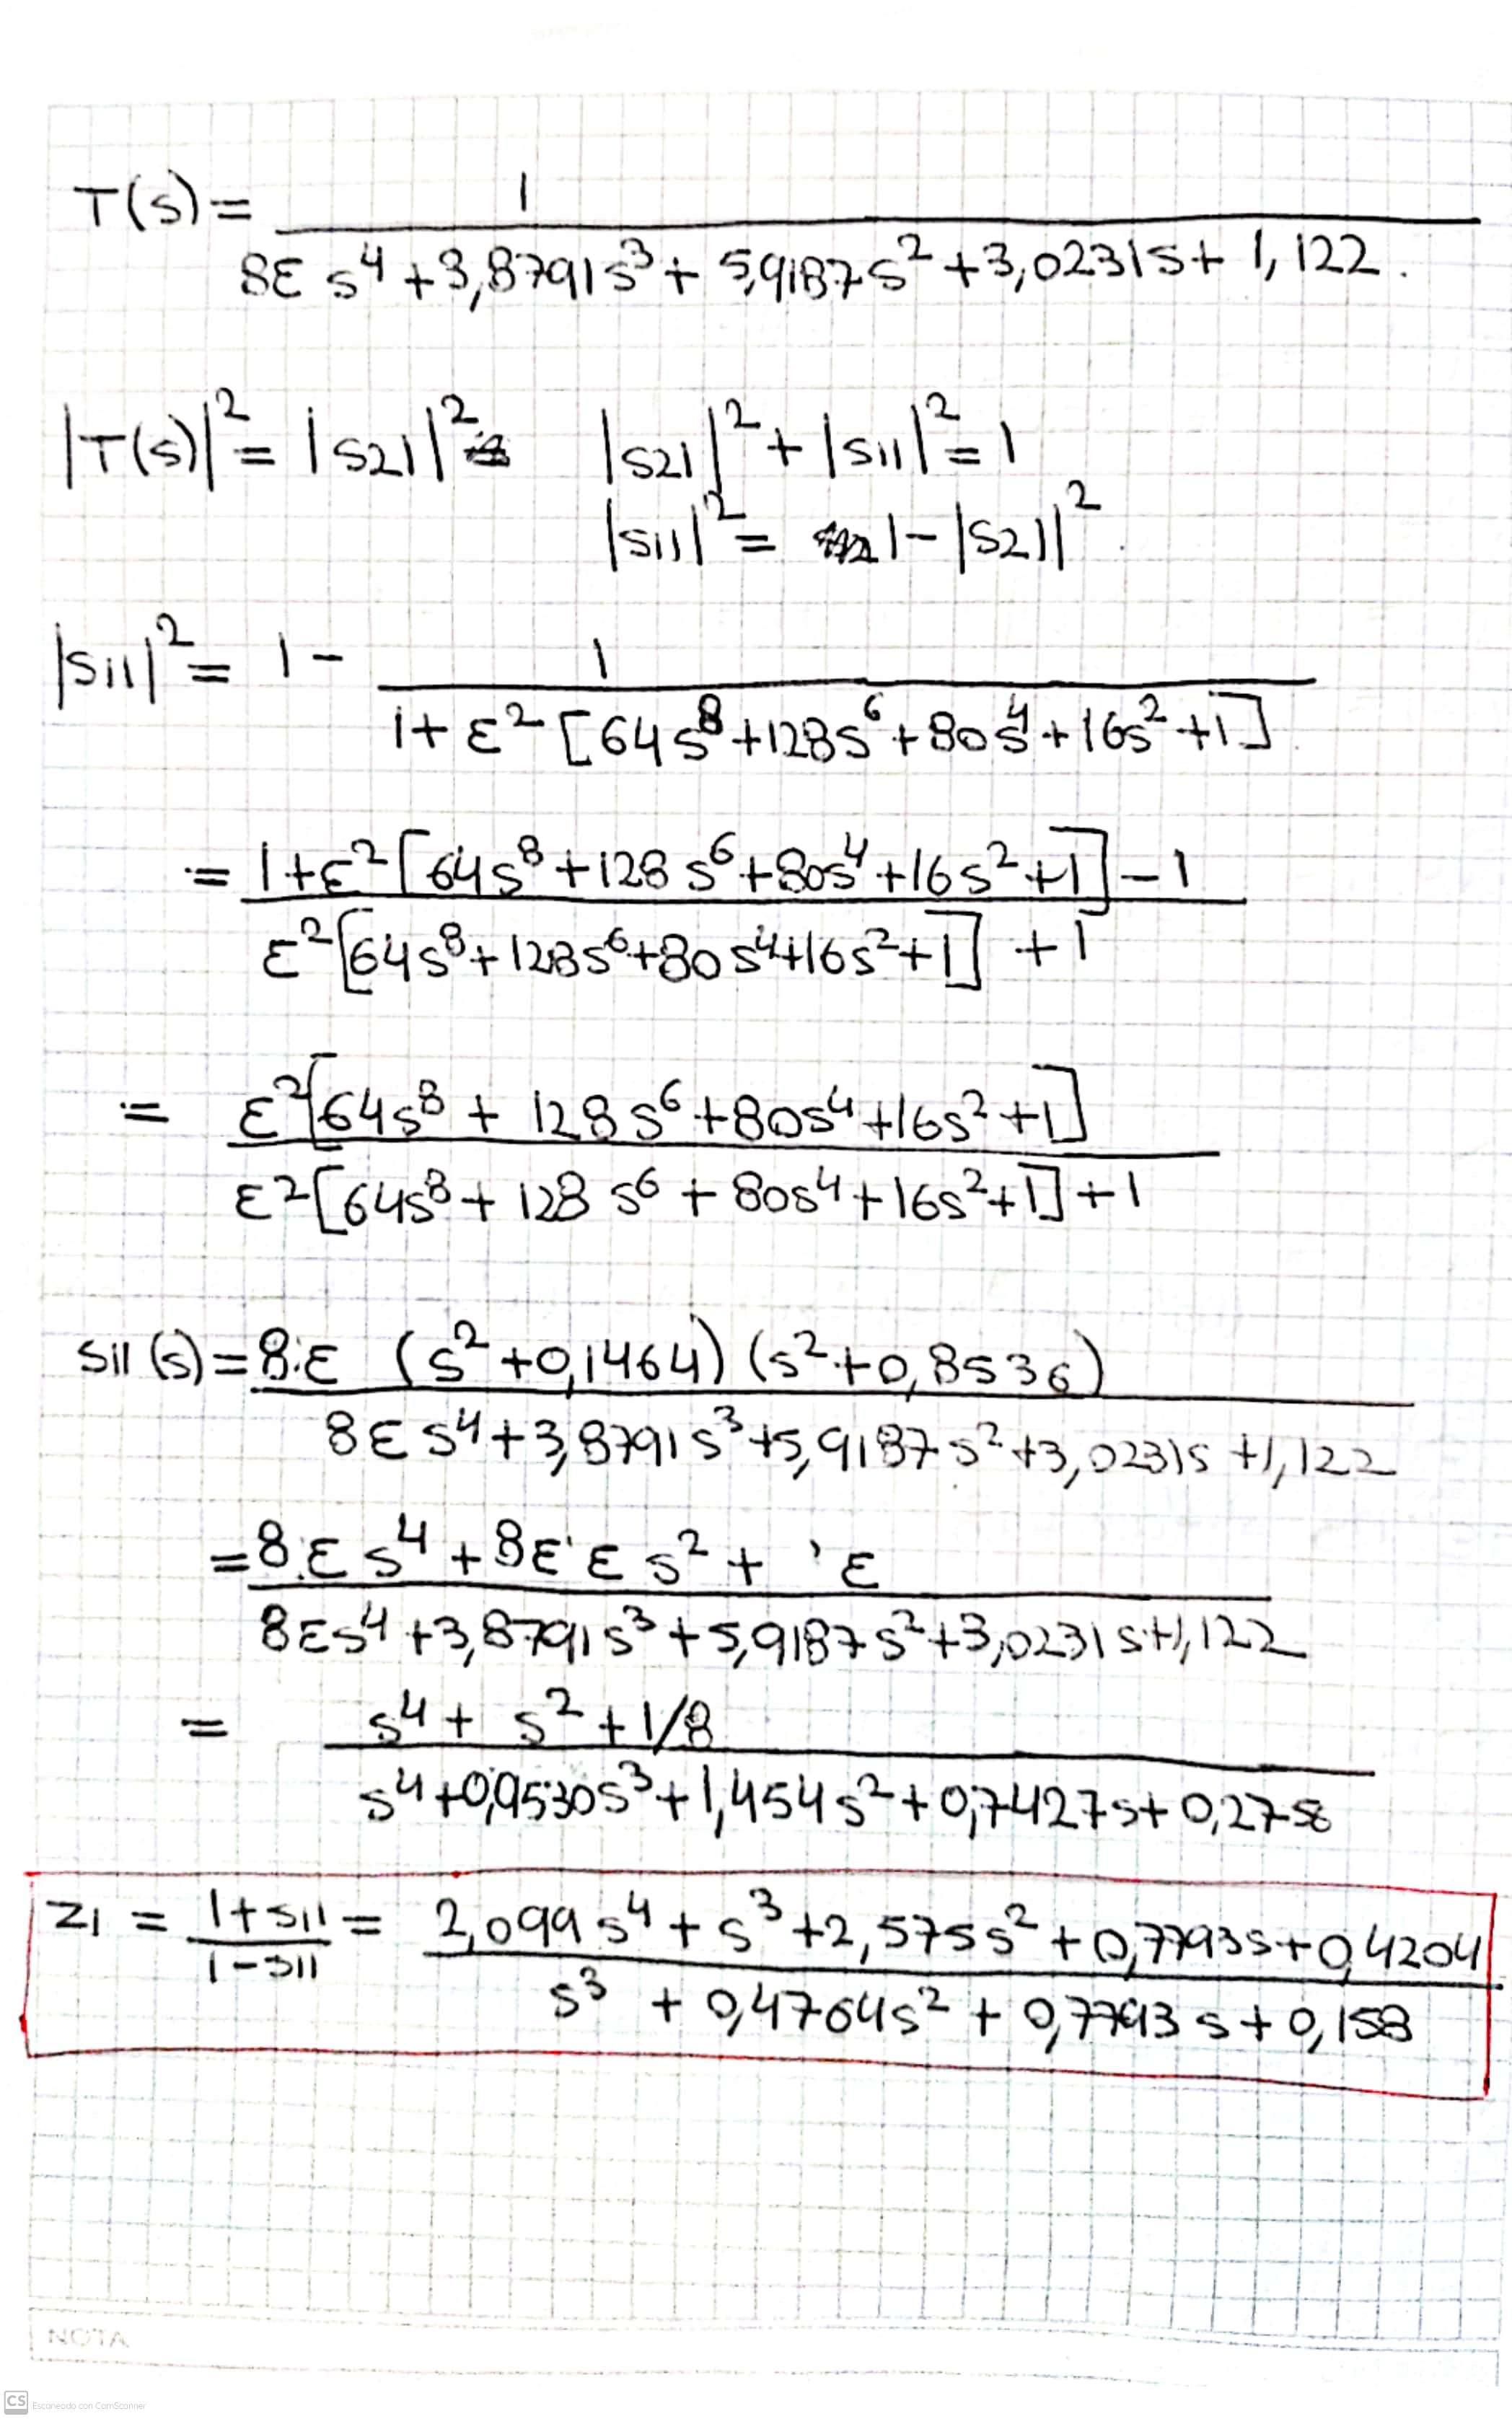

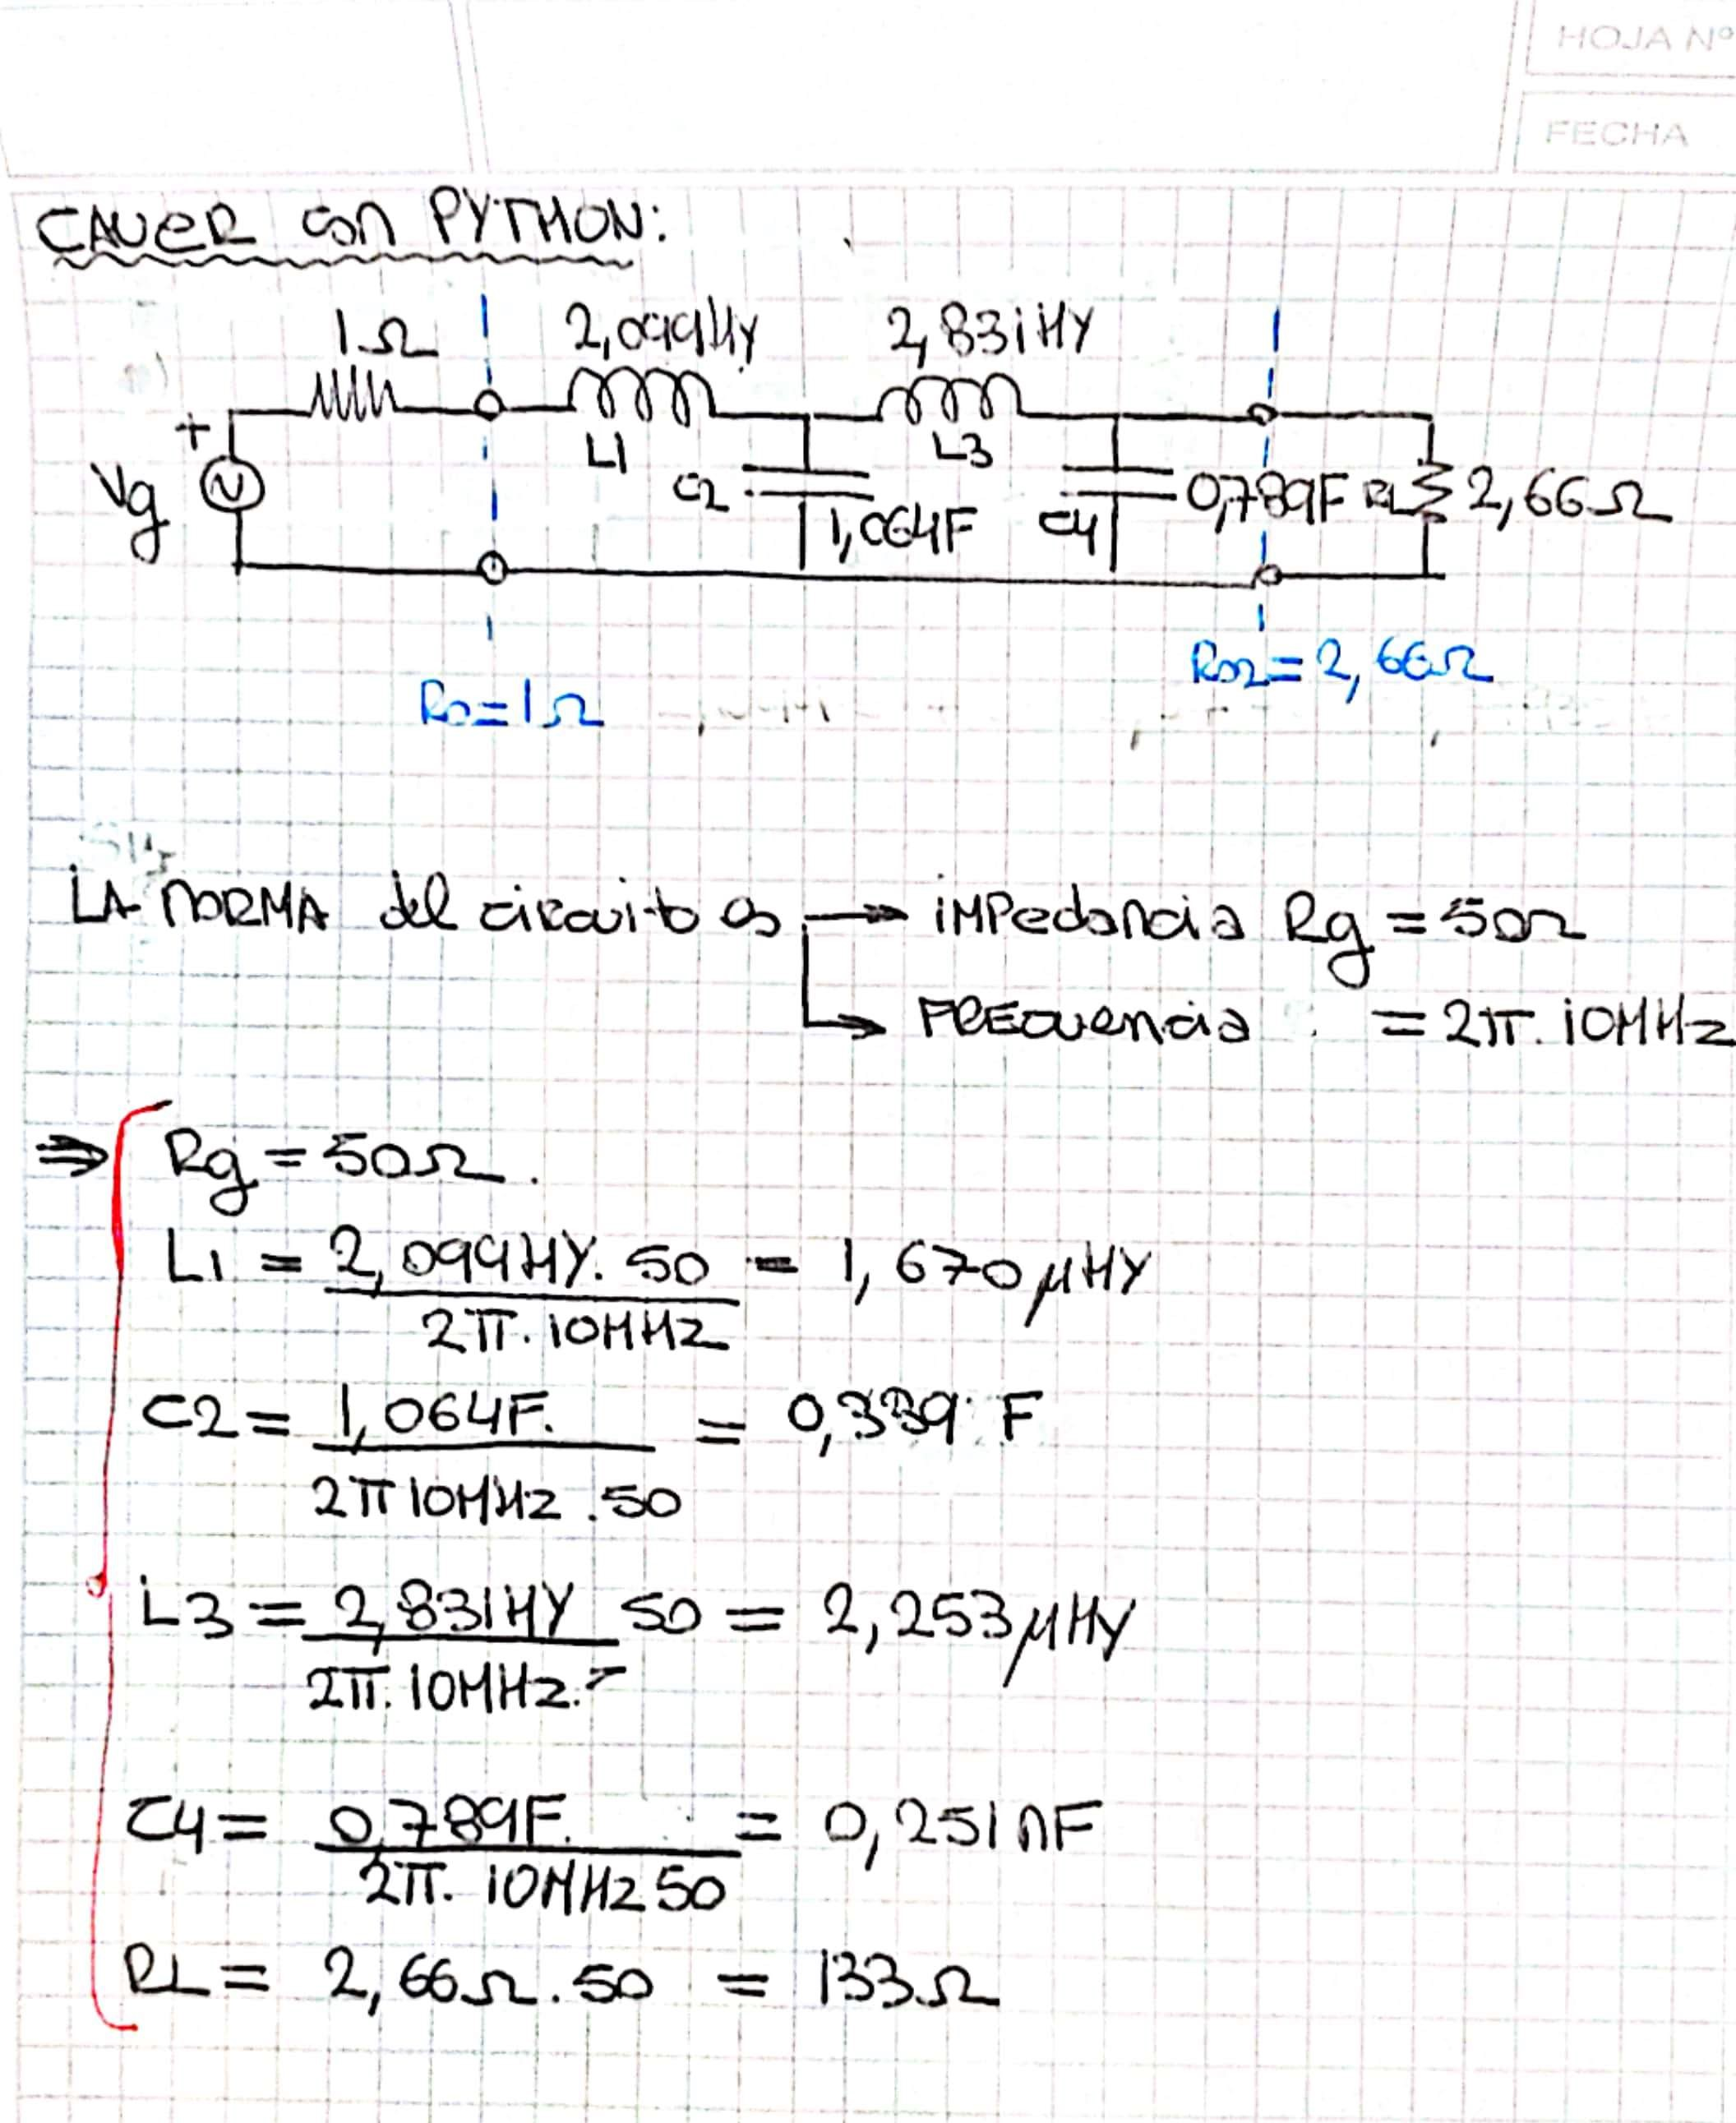

## Simulacion

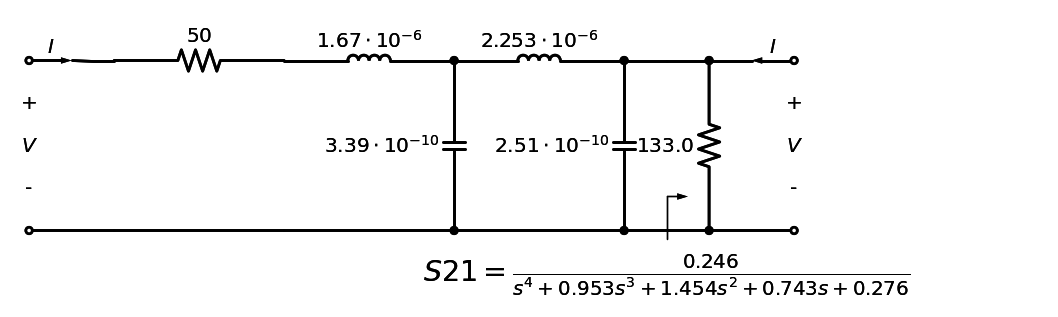

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 27 13:37:47 2022

@author: Joaquin
"""

import ltspice

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

import splane as splane

import sympy as sim

from schemdraw import Drawing
from schemdraw.elements import  Resistor, Capacitor, Inductor, Line

plt.close('all')
norma_Z = 50
norma_frec = 2*np.pi*10e6

z,p,k = sig.cheb1ap(4, 1)
S21 = sig.zpk2tf(z, p, k)

num,den = S21[0],S21[1]

s = sim.symbols('s ', complex=True)

num_sim = float(num)
den_sim = s**4+den[1]*s**3+den[2]*s**2+den[3]*s+den[4]

S21 = num_sim/den_sim

S11 = (s**4+s**2+1/8) / den_sim

Z1 = (den_sim+(s**4+s**2+1/8))/(den_sim-(s**4+s**2+1/8))


Z1_A,L1 = splane.remover_polo_infinito(Z1)

L1= (L1*norma_Z/norma_frec).subs(s, 1).round(9) 


for a in sim.preorder_traversal(Z1_A):
    if isinstance(a, sim.Float):
        Z1_A = Z1_A.subs(a, round(a, 10))


Y1_B,C2 = splane.remover_polo_infinito(1/Z1_A)

C2= (C2*1/(norma_Z*norma_frec)).subs(s, 1).round(12) 

for a in sim.preorder_traversal(Y1_B):
    if isinstance(a, sim.Float):
        Y1_B = Y1_B.subs(a, round(a, 8))


Z1_C,L3 = splane.remover_polo_infinito(1/Y1_B)
L3= (L3*norma_Z/norma_frec).subs(s, 1).round(9) 

for a in sim.preorder_traversal(Z1_C):
    if isinstance(a, sim.Float):
        Z1_C = Z1_C.subs(a, round(a, 7))

        
Y1_D,C4 = splane.remover_polo_infinito(1/Z1_C)
C4= (C4*1/(norma_Z*norma_frec)).subs(s, 1).round(12) 

        
RL = 1/(s*Y1_D.subs(s, 1).round(4)/s) * norma_Z

RG = s*50/s

# Dibujamos la red resultante:
    
for a in sim.preorder_traversal(S21):
    if isinstance(a, sim.Float):
        S21 = S21.subs(a, round(a, 3))
    
d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = splane.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')


d = splane.dibujar_elemento_serie(d, Resistor, RG)
d = splane.dibujar_elemento_serie(d, Inductor, L1)
d = splane.dibujar_elemento_derivacion(d, Capacitor, C2)
d = splane.dibujar_elemento_serie(d, Inductor, L3)
d = splane.dibujar_elemento_derivacion(d, Capacitor, C4)

d, zz_lbl = splane.dibujar_funcion_exc_abajo(d, 
                                          'S21',  
                                          S21, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = splane.dibujar_elemento_derivacion(d, Resistor, RL)



d = splane.dibujar_puerto_salida(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')



display(d)




### Simulacion en LTSpice
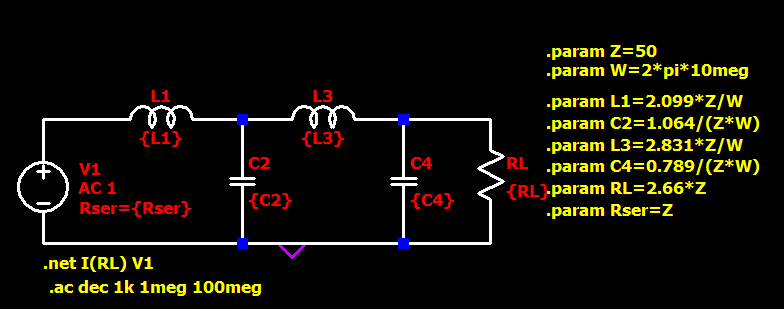

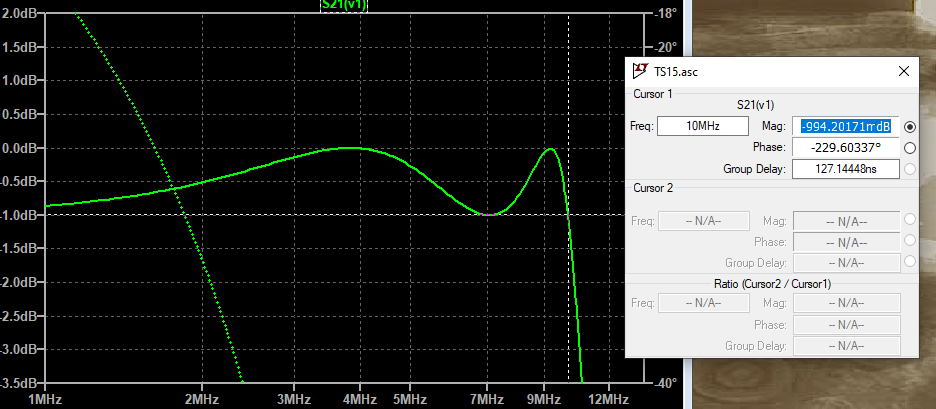

Se observa que el parametro $S_{21}$ en f = 10 MHz vale -1dB corroborando la transferencia Chebyshev de 1dB de ripple y cuarto orden con 4 rebotes.

Además la transferencia de potencia $|S_{21}|^2$:

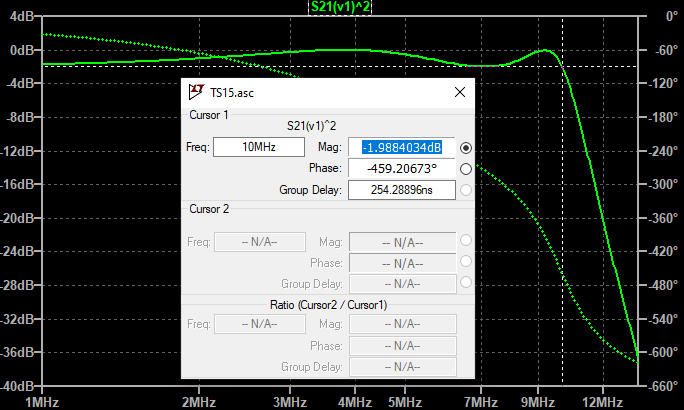

Para los rebotes en 0dB la potencia que se transmite al puerto 1 se transmite de forma total a la carga, lograndose la máxima transferencia de potencia para un plano de referencia de $Ro1 = 50\Omega$ y $Ro2 = 133 \Omega$
Para f = 0Hz y f=10MHz  la potencia transmitida al puerto 2 será de solamente del 63% (-2dB de potencia)

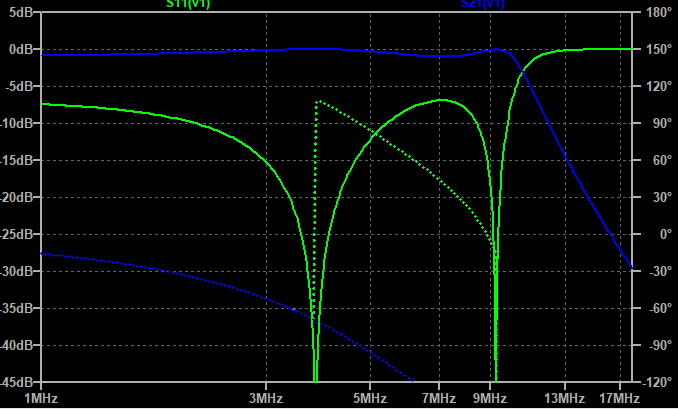
En esta imagen se corrobora que para los puntos donde hay maxima transferencia de potencia disponible, el coeficiente de reflexion $S_{11}$ tiende a 0, ya que la potencia que esta llegando al puerto 1 se esta transmitiendo completamente, nada se refleja, y ademas en el puerto 2 nada se refleja tampoco.